# Problem statement :Fraud detection

https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

About Dataset
Context
It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.

Content
The dataset contains transactions made by credit cards in September 2013 by European cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

Given the class imbalance ratio, we recommend measuring the accuracy using the Area Under the Precision-Recall Curve (AUPRC). Confusion matrix accuracy is not meaningful for unbalanced classification.

# Import the libraries

In [193]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Read the datasets

In [194]:
df = pd.read_csv('creditcard.csv')
pd.options.display.max_columns = None
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# Descriptive Statistics

In [195]:
df.shape

(284807, 31)

In [196]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [197]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [198]:
df['Class'].unique()

array([0, 1])

In [199]:
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [200]:
df= df.drop(['Time'],axis=1)

In [201]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [202]:
df.duplicated().any()

True

In [203]:
df.duplicated().sum()

9144

In [204]:
df=df.drop_duplicates()

# Visualise the Target Data

In [137]:
df['Class'].value_counts() # output shows that dataset is imbalanced where 0 --> normal tx and 1--> Fraudulent tx

0    275190
1       473
Name: Class, dtype: int64

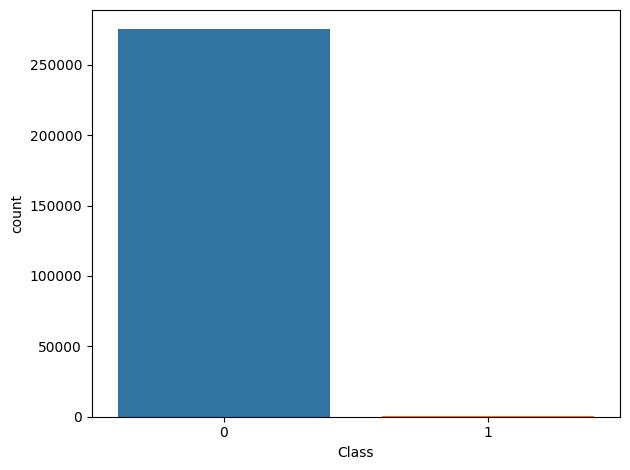

In [138]:
#Visualise the Target variable data
sns.countplot(x=df['Class'])
plt.tight_layout()
plt.show()

# Feature Scaling

In [205]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df['Amount']=sc.fit_transform(pd.DataFrame(df['Amount']))

# Independent and dependent Variables

In [206]:
# Independent and target variables
X=df.drop('Class',axis=1)
y=df['Class']

Note : Use any one Over sampling/Under sampling .
       Output score is better with over sampling

# Using Under sampling and Train test split

In [77]:
#under sampling
normal_tx = df[df['Class']==0]
fraud_tx = df[df['Class']==1]


In [79]:
normal_tx.shape

(275190, 30)

In [80]:
fraud_tx.shape

(473, 30)

In [81]:
normal_sample = normal_tx.sample(n=473)

In [82]:
normal_sample.shape

(473, 30)

In [87]:
df_new1 = pd.concat([normal_sample,fraud_tx],ignore_index=True)

In [86]:
df_new1['Class'].value_counts()

0    473
1    473
Name: Class, dtype: int64

In [88]:
df_new1.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-2.885220,-0.662412,-0.360413,2.245570,2.007156,-2.092140,-0.138316,-0.930506,0.819653,1.674021,0.505734,-0.099356,0.678152,-2.178648,1.999611,-0.235196,1.108597,0.590230,1.097963,-0.497785,-0.451446,0.336560,-2.073829,0.477856,-1.496020,-0.446612,0.467788,-1.578614,-0.353766,0
1,1.248358,-0.825315,1.051504,-0.729753,-1.425223,-0.065591,-1.214883,0.229838,-0.605972,0.740467,1.704969,-0.039973,-0.291161,-0.115577,0.702936,1.346367,0.185397,-0.814840,0.075824,0.059582,0.476837,1.277465,-0.066287,0.255251,0.276176,-0.049330,0.045029,0.015568,-0.259024,0
2,1.077364,-0.404102,0.674944,0.208190,-1.008414,-0.661199,-0.372337,0.054782,0.612625,-0.177168,-0.057791,-0.502444,-1.571618,0.463406,1.631595,0.150957,0.097988,-0.609386,-0.600962,-0.079662,0.051913,-0.014150,0.060702,0.436291,0.002226,0.996207,-0.070957,0.017536,-0.085297,0
3,2.097707,-0.844628,-1.589285,-0.651644,-0.076430,-0.052728,-0.345016,-0.067625,-0.624996,1.003852,-0.005678,0.368779,-0.067249,0.320053,-0.925436,-1.325016,-0.398317,1.221785,0.010466,-0.496969,-0.587988,-1.251961,0.278735,0.058519,-0.286865,0.374174,-0.077292,-0.062431,-0.156383,0
4,1.099319,-0.659109,0.583496,0.282875,-0.612438,0.774445,-0.739143,0.233768,-1.046023,0.883558,0.631094,0.714236,0.990465,0.030055,0.621301,-0.857481,-0.656892,1.644949,-1.086479,-0.308167,-0.337456,-0.662899,-0.030740,-0.865941,0.197658,-0.439875,0.072159,0.037104,0.025676,0


In [89]:
X=df_new1.drop('Class',axis=1)
y=df_new1['Class']

In [ ]:
#Train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

# Using Oversampling and Train test split

In [207]:
#oversampling :SMOTE
X=df.drop('Class',axis=1)
y=df['Class']

In [208]:
X.shape

(275663, 29)

In [209]:
y.shape

(275663,)

In [210]:
from imblearn.over_sampling import SMOTE
X_res,y_res = SMOTE().fit_resample(X,y)


In [211]:
y_res.shape

(550380,)

In [212]:
y_res.value_counts()

0    275190
1    275190
Name: Class, dtype: int64

In [213]:
#Train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_res,y_res,test_size=0.2,random_state=42)

# Logistic Regression

In [214]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(X_train,y_train)


LogisticRegression()

In [215]:
y_pred1 = log.predict(X_test)

In [216]:
from sklearn.metrics import accuracy_score,precision_score,f1_score,recall_score
accuracy_score(y_test,y_pred1)

0.9444111341255133

In [217]:
precision_score(y_test,y_pred1)

0.9733335915411131

In [218]:
recall_score(y_test,y_pred1)

0.9137865207352326

In [219]:
f1_score(y_test,y_pred1)

0.9426205680741928

# Decision tree Classifier

In [220]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [221]:
y_pred2 = dt.predict(X_test)

In [222]:
accuracy_score(y_test,y_pred2)

0.9981921581452814

In [223]:
precision_score(y_test,y_pred2)

0.9974223061283765

In [224]:
recall_score(y_test,y_pred2)

0.9989636928894787

In [225]:
f1_score(y_test,y_pred2)

0.9981924044653968

# Random Forest Classifier

In [226]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [227]:
y_pred3 = rf.predict(X_test)

In [228]:
accuracy_score(y_test,y_pred3)

0.9999091536756423

In [229]:
precision_score(y_test,y_pred3)

0.999818224783233

In [230]:
recall_score(y_test,y_pred3)

1.0

In [231]:
f1_score(y_test,y_pred3)

0.9999091041303083

# Final - Accuracy Score

In [232]:
#Final - Accuracy Score
final_data = pd.DataFrame({'Models':['LR','DT','RF'],
                           'ACC':[accuracy_score(y_test,y_pred1),
                                  accuracy_score(y_test,y_pred2),
                                  accuracy_score(y_test,y_pred3)
                                  ]})

In [233]:
final_data

,Models,ACC
0,LR,0.944411
1,DT,0.998192
2,RF,0.999909


# Save the Best Model on entire data

In [234]:
rf1 = RandomForestClassifier()
rf1.fit(X_res,y_res)  # as we get better results with oversampling

RandomForestClassifier()

# Load the model for prediction


In [235]:
import joblib
joblib.dump(rf1,"Credit_Card_model")

['Credit_Card_model']

In [236]:
model = joblib.load("Credit_Card_model")

# perform prediction on the fitted model

In [245]:
prediction = model.predict([[1.99,	0.158476,	-2.583441	,0.408670,	1.151147,	-0.096695,	0.2,	-0.068,	0.579,	-0.882,	0.490	,0.7289,	0.3808,	-1.9488	,-0.8324,	0.519436	,0.903562,	1.197315,	0.593509,	-0.017652,	-0.164350,	-0.295135,	-0.072173,	-0.450261,	0.313267,	-0.289617,	0.002988,	-0.015309	,-0.189754]]) #since we have 29 columns

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [246]:
if prediction ==0:
  print("Normal Transaction")
else:
  print("Fraudulent Transaction")

Fraudulent Transaction
